In [29]:
# Example 6-5
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

dat = pd.read_csv('../data/weather_data.csv',engine='python')
dat

,branch,date,average,min,max
0,108,01/01/2011,-6.8,-10.4,-2.9
1,108,02/01/2011,-5.4,-8.5,-1.2
2,108,03/01/2011,-4.5,-8.5,-0.3
3,108,04/01/2011,-3.9,-7.4,-1.7
4,108,05/01/2011,-4.0,-7.7,-1.8
5,108,06/01/2011,-7.6,-9.8,-4.6
6,108,07/01/2011,-7.0,-10.6,-2.9
7,108,08/01/2011,-3.6,-8.2,0.1
8,108,09/01/2011,-7.0,-10.3,-0.3
9,108,10/01/2011,-8.2,-11.8,-4.6


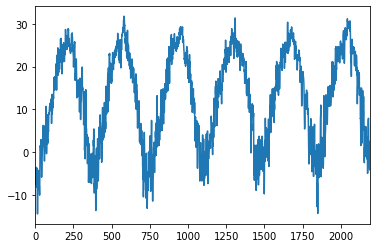

In [30]:
#temp = dat['average(°C)']
temp = dat['average']
temp.plot()
plt.show()

In [31]:
train_x = np.array(temp[:1461])
test_x  = np.array(temp[1461:])


In [34]:
ATTR_SIZE = 180
tmp = []
train_X = []
for i in range(0,len(train_x)-ATTR_SIZE):
    tmp.append(train_x[i:i+ATTR_SIZE])
train_X = np.array(tmp)
pd.DataFrame(train_X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-6.8,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,...,26.6,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0
1,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,...,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8
2,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,...,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1
3,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,...,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7
4,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,...,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6
5,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,...,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6,22.5
6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,...,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6,22.5,24.3
7,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,...,19.2,24.1,21.0,23.8,25.1,24.7,22.6,22.5,24.3,25.6
8,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,-6.7,...,24.1,21.0,23.8,25.1,24.7,22.6,22.5,24.3,25.6,22.9
9,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,-6.7,-6.6,...,21.0,23.8,25.1,24.7,22.6,22.5,24.3,25.6,22.9,22.4


In [37]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(180,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,128)
        self.fc4 = nn.Linear(128,180)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = Net()

In [38]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(1000):
    total_loss = 0
    d = []
    for i in range(100):          ## minibatches with size of 100
        index = np.random.randint(0,1281)
        d.append(train_X[index])
    d = torch.from_numpy(np.array(d, dtype='float32'))
    
    optimizer.zero_grad()
    output = model(d)
    loss = criterion(output, d)
    loss.backward()
    optimizer.step()
    total_loss += loss.data.item()
    
    if (epoch+1)%100 == 0:
        print(epoch+1, total_loss)

100 8.217508316040039
200 8.140780448913574
300 7.74566650390625
400 7.348391056060791
500 6.91606330871582
600 6.6355109214782715
700 5.6141676902771
800 5.380210876464844
900 5.06799840927124
1000 4.701549530029297


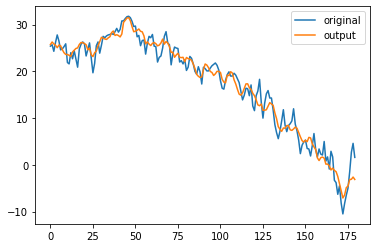

In [40]:
plt.plot(d.data[0].numpy(), label='original')
plt.plot(output.data[0].numpy(), label='output')
plt.legend(loc='upper right')
plt.show()

In [41]:
tmp = []
text_X = []
for i in range(0,4):
    tmp.append(test_x[i*180:(i+1)*180])
test_X = np.array(tmp, dtype="float32")

pd.DataFrame(test_X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-7.7,-6.000000,-2.700000,2.500000,3.700000,-3.200000,-5.500000,-5.1,-2.1,-0.3,...,19.600000,22.4,24.0,24.700001,25.700001,24.799999,21.000000,25.200001,25.400000,25.700001
1,24.4,23.700001,23.700001,23.299999,24.100000,24.200001,25.299999,25.6,23.4,26.5,...,-4.600000,-3.3,-0.1,1.500000,2.200000,3.100000,5.900000,1.500000,-0.800000,0.900000
2,-5.7,-5.700000,-3.200000,0.300000,0.700000,1.200000,5.700000,6.5,2.0,-2.7,...,23.799999,20.9,20.9,23.799999,24.500000,24.100000,24.700001,26.000000,24.299999,24.700001
3,23.1,22.799999,24.400000,24.400000,24.700001,25.299999,24.600000,24.0,23.5,23.5,...,-1.100000,2.3,3.4,-1.400000,-5.000000,-4.700000,2.700000,4.900000,7.200000,7.600000


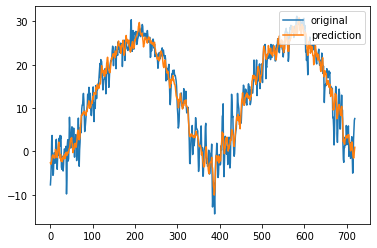

In [47]:
d = torch.from_numpy(test_X)
output = model(d)
test = test_X.flatten()
pred = output.data.numpy().flatten()
plt.plot(test, label='original')
plt.plot(pred, label='prediction')
plt.legend(loc='upper right')
plt.show()

In [50]:
total_score = []
for i in range(0,len(test)):
    dist = (test[i]-pred[i])
    score = pow(dist, 2)
    total_score.append(score)
total_score = np.array(total_score)
total_score = total_score / np.max(total_score)
total_score


array([3.12789440e-01, 1.11792314e-01, 2.38628129e-04, 2.44940125e-01,
       2.92094155e-01, 6.24617379e-02, 2.66022934e-01, 1.88296873e-01,
       5.04463131e-03, 7.15748026e-03, 1.48887658e-02, 3.13309386e-02,
       8.44216307e-04, 7.09904956e-02, 1.02474107e-01, 2.09476105e-02,
       8.67786074e-02, 7.04292467e-03, 6.72405485e-03, 8.29827228e-02,
       2.27130426e-03, 6.91316125e-02, 6.21899843e-02, 3.34350724e-01,
       1.64546654e-01, 4.05300646e-01, 3.44619514e-02, 6.39699460e-02,
       1.91605685e-02, 4.07729213e-02, 1.01102744e-01, 4.67779094e-02,
       1.52591841e-02, 5.71284545e-02, 1.46678460e-02, 2.59521665e-02,
       2.72208529e-02, 2.38411975e-02, 1.00000000e+00, 2.77586687e-01,
       4.03559344e-02, 1.20533653e-01, 4.67236495e-02, 2.92226312e-02,
       2.37334930e-02, 6.25312202e-01, 1.64203332e-01, 2.29749110e-03,
       5.53116109e-02, 4.60286841e-04, 4.76548954e-02, 1.63699791e-01,
       4.47852477e-02, 1.62103130e-02, 2.55638316e-02, 2.99224654e-01,
      

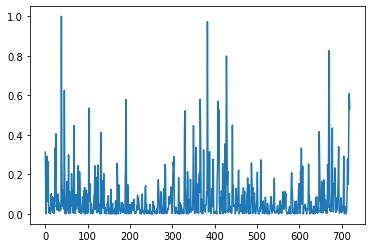

In [51]:
plt.plot(total_score)
plt.show()